In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")
     

In [4]:
df.head(21)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M
5,2025.0,EN,FT,Data Engineer,80000,USD,80000,US,0,US,M
6,2025.0,SE,FT,Data Scientist,185000,USD,185000,US,0,US,M
7,2025.0,SE,FT,Data Scientist,148000,USD,148000,US,0,US,M
8,2025.0,MI,FT,Data Scientist,135000,USD,135000,CA,0,CA,M
9,2025.0,MI,FT,Data Scientist,108000,USD,108000,CA,0,CA,M


In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  str    
 2   employment_type     133349 non-null  str    
 3   job_title           133349 non-null  str    
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  str    
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  str    
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  str    
 10  company_size        133349 non-null  str    
dtypes: float64(1), int64(3), str(7)
memory usage: 11.2 MB


In [6]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [7]:
df.shape

(133349, 11)

In [8]:
linhas, colunas = df.shape[0], df.shape[1]
print(f"Linhas: {linhas} | Colunas: {colunas}")

Linhas: 133349 | Colunas: 11


In [9]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='str')

In [10]:
renomear_colunas = {
    "work_year": "ano",
    "experience_level": "senioridade",
    "employment_type": "contrato",
    "job_title": "cargo",
    "salary": "salario",
    "salary_currency": "moeda",
    "salary_in_usd": "usd",
    "employee_residence": "residencia",
    "remote_ratio": "remoto",
    "company_location": "empresa",
    "company_size": "porte_empresa"
}
df.rename(columns=renomear_colunas, inplace=True)


In [11]:
df.columns

Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda', 'usd',
       'residencia', 'remoto', 'empresa', 'porte_empresa'],
      dtype='str')

In [12]:
senioridade = {
    "SE": "Sênior",
    "MI": "Pleno",
    "EN": "Entrada",
    "EX": "Executivo"
}
df["senioridade"] = df["senioridade"].replace(senioridade)
df["senioridade"].value_counts()

senioridade
Sênior       77241
Pleno        40465
Entrada      12443
Executivo     3200
Name: count, dtype: int64

In [13]:
traducao_contrato = {
  "FT": "Tempo Integral",
  "PT": "Meio Período",
  "CT": "Contratado",
  "FL": "Freelancer"
}
df["contrato"] = df["contrato"].replace(traducao_contrato)
df["contrato"].value_counts()

contrato
Tempo Integral    132563
Contratado           394
Meio Período         376
Freelancer            16
Name: count, dtype: int64

In [14]:
traducao_remoto = {
    0: "Presencial",
    50: "Híbrido",
    100: "Remoto"
}
df["remoto"] = df["remoto"].replace(traducao_remoto)
df["remoto"].value_counts()

remoto
Presencial    105312
Remoto         27718
Híbrido          319
Name: count, dtype: int64

In [15]:
tamanho_empresa = {
    "S": "Pequena",
    "M": "Média",
    "L": "Grande"
}
df["porte_empresa"] = df["porte_empresa"].replace(tamanho_empresa)
df["porte_empresa"].value_counts()

porte_empresa
Média      129561
Grande       3574
Pequena       214
Name: count, dtype: int64

In [16]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,porte_empresa
0,2025.0,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Entrada,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [17]:
df.describe(include="object")

C:\Users\rodri\AppData\Local\Temp\ipykernel_53592\702825166.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  df.describe(include="object")


,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,porte_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Sênior,Tempo Integral,Data Scientist,USD,US,Presencial,US,Média
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [18]:
#verifica se há valores faltantes (vazios/nulos)
df.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,porte_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [19]:
#identifica a quantidade de valores faltantes por coluna
df.isnull().sum()

ano              10
senioridade       0
contrato          0
cargo             0
salario           0
moeda             0
usd               0
residencia        0
remoto            0
empresa           0
porte_empresa     0
dtype: int64

In [20]:
# quantos anos faltantes 
df["ano"].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [21]:
#linhas com ano nulo, um filtro dentro da base
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,porte_empresa
5588,NaN,Sênior,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,Média
59692,NaN,Pleno,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Média
59710,NaN,Entrada,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Média
59759,NaN,Sênior,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Média
59789,NaN,Sênior,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,Média
131000,NaN,Sênior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Média
131006,NaN,Sênior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Média
133054,NaN,Entrada,Tempo Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Tempo Integral,Data Scientist,130000,USD,130000,US,Híbrido,US,Grande


In [22]:
#criar um dataframe de teste
import numpy as np
df_salarios = pd.DataFrame({
  "nome": ["Ana", "Bruno", "Carlos","Samuel", "Sara"],
  "salario": [4000, np.nan, 5000, np.nan, 150000] 
})
#calcula a media, e substitui os valores nulos pela média arredondada
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))
#calcula a mediana, e substitui os valores nulos pela mediana
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())

df_salarios

,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.0,4000.0
1,Bruno,NaN,53000.0,5000.0
2,Carlos,5000.0,5000.0,5000.0
3,Samuel,NaN,53000.0,5000.0
4,Sara,150000.0,150000.0,150000.0


In [23]:
df_temperatura = pd.DataFrame({
  "dia": ["Segunda", "Terça", "Quarta", "Quinta", "Sexta"],
  "temperatura": [22.5, 21.0, np.nan, np.nan, 28.00]
})

df_temperatura["preenchido_ffill"] = df_temperatura["temperatura"].ffill()
df_temperatura

,dia,temperatura,preenchido_ffill
0,Segunda,22.5,22.5
1,Terça,21.0,21.0
2,Quarta,NaN,21.0
3,Quinta,NaN,21.0
4,Sexta,28.0,28.0


In [24]:
df_temperatura = pd.DataFrame({
  "dia": ["Segunda", "Terça", "Quarta", "Quinta", "Sexta"],
  "temperatura": [22.5, 21.0, np.nan, np.nan, 28.00]
})

df_temperatura["preenchido_bfill"] = df_temperatura["temperatura"].bfill()
df_temperatura

,dia,temperatura,preenchido_bfill
0,Segunda,22.5,22.5
1,Terça,21.0,21.0
2,Quarta,NaN,28.0
3,Quinta,NaN,28.0
4,Sexta,28.0,28.0


In [25]:
df_cidade = pd.DataFrame({
  "nome": ["Ana", "Bruno", "Carlos","Samuel", "Sara"],
  "cidade": ["São Paulo", "Rio de Janeiro", np.nan, "Belo Horizonte", np.nan],
})

df_cidade["cidade_preenchida"] = df_cidade["cidade"].fillna("nao informado")
df_cidade

,nome,cidade,cidade_preenchida
0,Ana,São Paulo,São Paulo
1,Bruno,Rio de Janeiro,Rio de Janeiro
2,Carlos,NaN,nao informado
3,Samuel,Belo Horizonte,Belo Horizonte
4,Sara,NaN,nao informado


In [26]:
df_limpo = df.dropna()
df_limpo.isnull().sum()

ano              0
senioridade      0
contrato         0
cargo            0
salario          0
moeda            0
usd              0
residencia       0
remoto           0
empresa          0
porte_empresa    0
dtype: int64

In [27]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,porte_empresa
0,2025.0,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Entrada,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [28]:
df_limpo = df_limpo.assign(ano = df_limpo["ano"].astype("Int64"))
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ano            133339 non-null  float64
 1   senioridade    133349 non-null  str    
 2   contrato       133349 non-null  str    
 3   cargo          133349 non-null  str    
 4   salario        133349 non-null  int64  
 5   moeda          133349 non-null  str    
 6   usd            133349 non-null  int64  
 7   residencia     133349 non-null  str    
 8   remoto         133349 non-null  object 
 9   empresa        133349 non-null  str    
 10  porte_empresa  133349 non-null  str    
dtypes: float64(1), int64(2), object(1), str(7)
memory usage: 11.2+ MB


<Axes: title={'center': 'Distribuição de Senioridade dos Profissionais'}, xlabel='senioridade'>

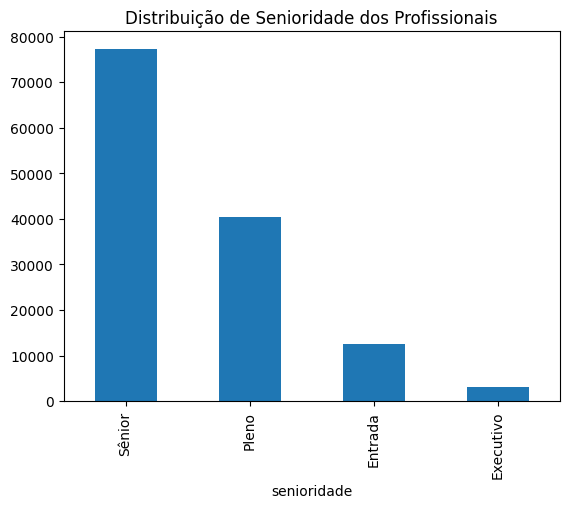

In [29]:
df_limpo["senioridade"].value_counts().plot(kind='bar', title='Distribuição de Senioridade dos Profissionais')

<Axes: xlabel='senioridade', ylabel='usd'>

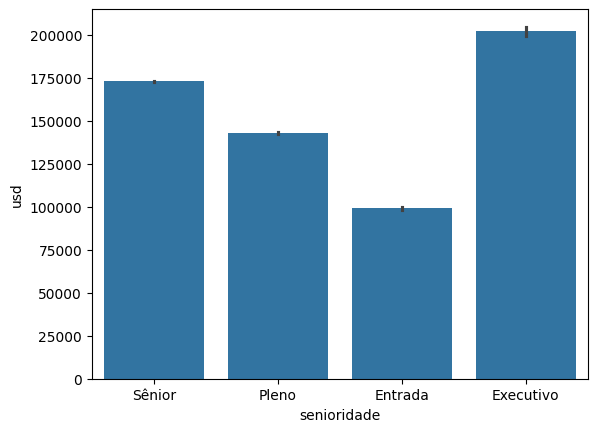

In [30]:
import seaborn as sns

sns.barplot(data=df_limpo, x="senioridade", y="usd" )

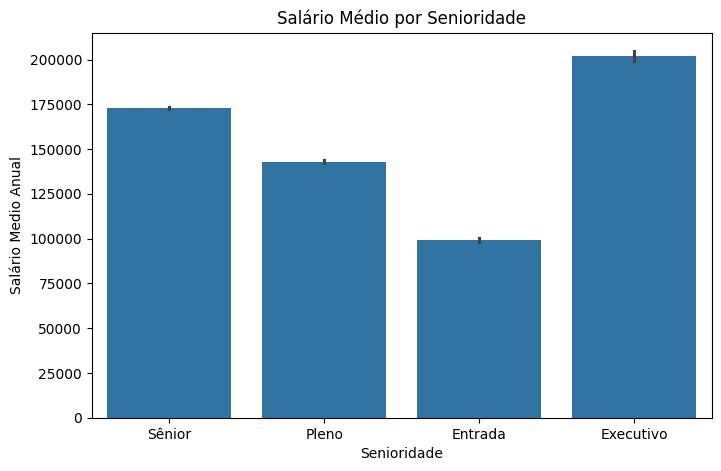

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x="senioridade", y="usd" )
plt.title("Salário Médio por Senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário Medio Anual")
plt.show()

In [32]:
df_limpo.groupby("senioridade")["usd"].min().sort_values(ascending=False)

senioridade
Sênior       15645
Entrada      15000
Executivo    15000
Pleno        15000
Name: usd, dtype: int64

In [33]:
ordem = df_limpo.groupby("senioridade")["usd"].mean().sort_values(ascending=True).index
ordem

Index(['Entrada', 'Pleno', 'Sênior', 'Executivo'], dtype='str', name='senioridade')

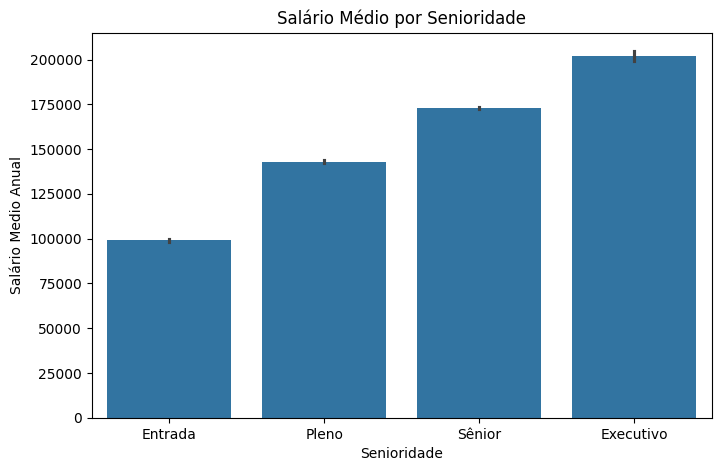

In [34]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x="senioridade", y="usd" , order=ordem)
plt.title("Salário Médio por Senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário Medio Anual")
plt.show()

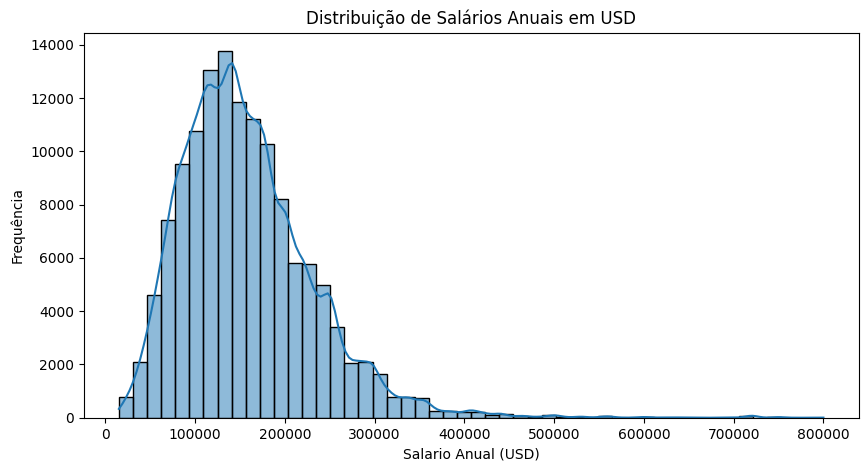

In [35]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_limpo["usd"], bins=50, kde=True)
plt.title("Distribuição de Salários Anuais em USD")
plt.xlabel("Salario Anual (USD)")
plt.ylabel("Frequência")
plt.show()

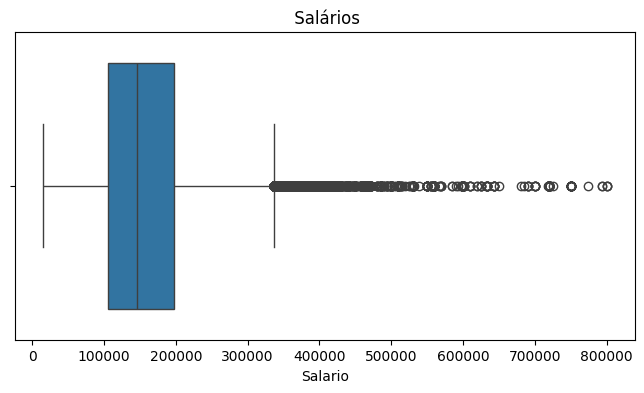

In [36]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df_limpo, x="usd")
plt.title(" Salários")
plt.xlabel("Salario" )
plt.show()

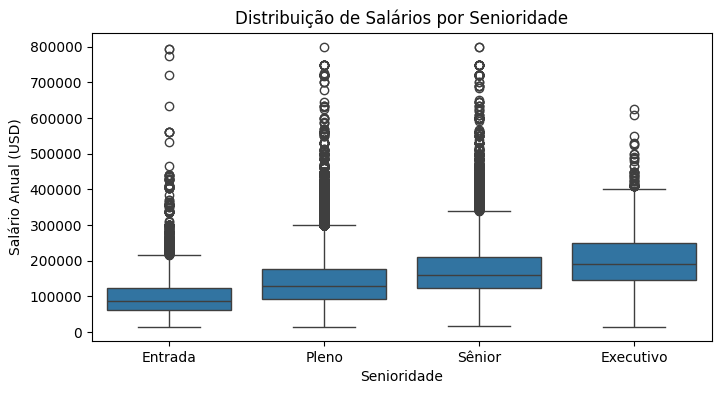

In [37]:

plt.figure(figsize=(8,4))
ordem_senioridade = ["Entrada", "Pleno", "Sênior", "Executivo"]
sns.boxplot(data=df_limpo, x="senioridade", y="usd", order=ordem_senioridade, )
plt.title("Distribuição de Salários por Senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário Anual (USD)")
plt.show()

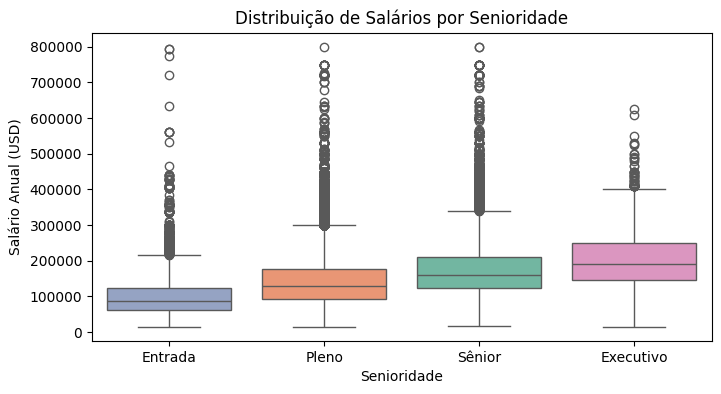

In [38]:

plt.figure(figsize=(8,4))
ordem_senioridade = ["Entrada", "Pleno", "Sênior", "Executivo"]
sns.boxplot(data=df_limpo, x="senioridade", y="usd", order=ordem_senioridade, palette="Set2", hue="senioridade")
plt.title("Distribuição de Salários por Senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário Anual (USD)")
plt.show()

In [39]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'notebook_connected'

In [40]:
senioridade_media_salario = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).reset_index()
fig = px.bar(senioridade_media_salario,
x='senioridade',
y='usd',
title='Media Salarial por Senioridade',
labels={'senioridade': 'Nivel de Senioridade', 'usd': 'Média Salarial Anual (USD) '}
)
fig.show()

In [41]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']
fig = px.pie(remoto_contagem,
             names='tipo_trabalho', 
             values='quantidade', 
             title='Distribuição de Tipos de Trabalho',
             hole=0.5)
fig.update_traces(textinfo='percent+label')
fig.show()

In [42]:
salario_media_pais = df_limpo.groupby('residencia')['usd'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(8,6))
fig = px.bar(salario_media_pais, x='residencia', y='usd', title='Média de Salário por País')
fig.show()


<Figure size 800x600 with 0 Axes>

In [43]:
import pycountry

# Função para converter ISO-2 para ISO-3
def iso2_to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

# Criar nova coluna com código ISO-3
df_limpo['residencia_iso3'] = df_limpo['residencia'].apply(iso2_to_iso3)

# Calcular média salarial por país (ISO-3)
df_ds = df_limpo[df_limpo['cargo'] == 'Data Scientist']
media_ds_pais = df_ds.groupby('residencia_iso3')['usd'].mean().reset_index()

# Gerar o mapa
fig = px.choropleth(media_ds_pais,
                    locations='residencia_iso3',
                    color='usd',
                    color_continuous_scale='rdylgn',
                    title='Salário médio de Cientista de Dados por país',
                    labels={'usd': 'Salário médio (USD)', 'residencia_iso3': 'País'})

fig.show()

In [45]:
df_limpo.to_csv("imersao_final_dados.csv", index=False)

In [46]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,porte_empresa,residencia_iso3
0,2025,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média,USA
1,2025,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média,USA
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média,AUS
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média,AUS
4,2025,Entrada,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média,USA
